In [1]:
# Load packages and check versions
import sys
import numpy as np
import pandas as pd
# import geopandas as gpd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn

print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
# print('The GeoPandas version is {}.\n'.format(gpd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))

# The Python version is 3.7.5 (default, Nov  1 2019, 02:16:32) 
# [Clang 11.0.0 (clang-1100.0.33.8)].

# The Numpy version is 1.18.2.

# The Pandas version is 1.0.3.

# The Matplotlib version is 3.2.1.

# The Scikit-Learn version is 0.22.2.post1.

#More stuff
import datetime

The Python version is 3.7.5 (default, Nov  1 2019, 02:16:32) 
[Clang 11.0.0 (clang-1100.0.33.8)].

The Numpy version is 1.18.2.

The Pandas version is 1.0.3.

The Matplotlib version is 3.2.1.

The Scikit-Learn version is 0.22.2.post1.



# Load and explore

In [2]:
path = '../covid19-global-forecasting-week-1/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16188 entries, 0 to 16187
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              16188 non-null  int64  
 1   Province/State  7410 non-null   object 
 2   Country/Region  16188 non-null  object 
 3   Lat             16188 non-null  float64
 4   Long            16188 non-null  float64
 5   Date            16188 non-null  object 
 6   ConfirmedCases  16188 non-null  float64
 7   Fatalities      16188 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1011.9+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ForecastId      12212 non-null  int64  
 1   Province/State  5590 non-null   object 
 2   Country/Region  12212 non-null  object 
 3   Lat             12212 non-null  float64
 4   Long            12212 non-null  float64
 5   Date            12212 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 572.6+ KB


In [5]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ForecastId      12212 non-null  int64
 1   ConfirmedCases  12212 non-null  int64
 2   Fatalities      12212 non-null  int64
dtypes: int64(3)
memory usage: 286.3 KB


In [6]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

print(train['Date'].min())
print(train['Date'].max())
print(test['Date'].min())
print(test['Date'].max())

2020-01-22 00:00:00
2020-03-18 00:00:00
2020-03-12 00:00:00
2020-04-23 00:00:00


Looks like the training data is being updated on a regular basis. The testing data date range remains the same.

In [7]:
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [8]:
train.shape

(16188, 8)

In [9]:
n_train_dates = train['Date'].nunique()
n_train_countries = train['Country/Region'].nunique()
print(n_train_dates)
print(n_train_countries)
print(n_train_dates*n_train_countries)

57
163
9291


In [10]:
train.drop_duplicates().shape

(16188, 8)

In [11]:
train.groupby(['Date', 'Country/Region'])['Id'].count().count()

9291

Hmmmm

In [12]:
train.groupby(['Date', 'Country/Region'])['Id'].count().sort_values()

Date        Country/Region
2020-01-22  Afghanistan        1
2020-02-28  Malta              1
            Maldives           1
            Malaysia           1
            Luxembourg         1
                              ..
2020-02-21  US                58
2020-02-13  US                58
2020-03-05  US                58
2020-02-16  US                58
2020-03-13  US                58
Name: Id, Length: 9291, dtype: int64

In [13]:
date_mask = train['Date'] == datetime.datetime(2020,3,13)
country_mask = train['Country/Region'] == 'US'
train[date_mask & country_mask].head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
12249,19954,Alabama,US,32.3182,-86.9023,2020-03-13,5.0,0.0
12306,20047,Alaska,US,61.3707,-152.4044,2020-03-13,1.0,0.0
12363,20140,Arizona,US,33.7298,-111.4312,2020-03-13,9.0,0.0
12420,20233,Arkansas,US,34.9697,-92.3731,2020-03-13,6.0,0.0
12477,20326,California,US,36.1162,-119.6816,2020-03-13,282.0,4.0


So it looks like some countries are broken into Province/State, while others aren't.

In [14]:
temp_for_count = train.fillna('No Province/State')

In [15]:
temp_for_count.groupby(['Date', 'Country/Region', 'Province/State'])['Id'].count().count()

16188

In [16]:
train.shape

(16188, 8)

Aha

Check if same for test set:

In [18]:
temp_test_for_count = test.fillna('No Province/State')
print(test.shape[0])
print(temp_test_for_count.groupby(['Date', 'Country/Region'])['ForecastId']\
      .count().count())
print(temp_test_for_count.groupby(['Date', 'Country/Region', 'Province/State'])['ForecastId']\
      .count().count())

12212
7009
12212


Yes.

# Exploratory visualization

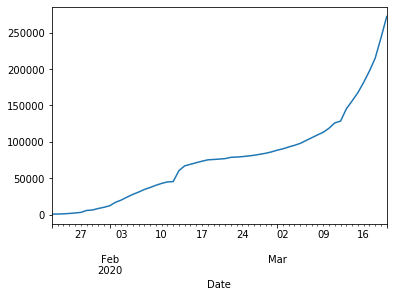

In [19]:
train.groupby('Date')['ConfirmedCases'].sum().plot() #.agg({'ConfirmedCases','sum'}).plot()

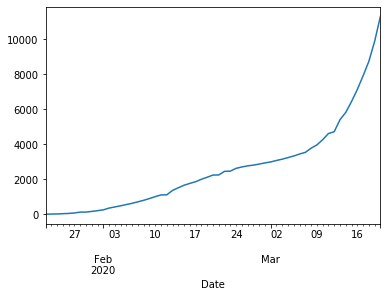

In [20]:
train.groupby('Date')['Fatalities'].sum().plot()

# First differencing

In [21]:
t = train.groupby('Date')['Fatalities'].sum()[1:]
t.head()

Date
2020-01-23    18.0
2020-01-24    26.0
2020-01-25    42.0
2020-01-26    56.0
2020-01-27    82.0
Name: Fatalities, dtype: float64

In [22]:
t_minus_1 = train.groupby('Date')['Fatalities'].sum()[:-1]
t_minus_1.head()

Date
2020-01-22    17.0
2020-01-23    18.0
2020-01-24    26.0
2020-01-25    42.0
2020-01-26    56.0
Name: Fatalities, dtype: float64

In [23]:
print(t.shape)
print(t_minus_1.shape)
print((t - t_minus_1).shape)

(58,)
(58,)
(59,)


In [24]:
(t - t_minus_1).head()

Date
2020-01-22    NaN
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
Name: Fatalities, dtype: float64

Looks like it's merging on date. Need to subtract values.

In [25]:
fd_vals = (t.values - t_minus_1.values)
fd_vals.shape

(58,)

In [26]:
fd_df = pd.DataFrame(data={'New fatalities per day':fd_vals}, index=t.index)

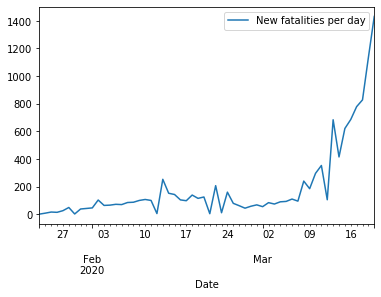

In [27]:
fd_df.plot()

# Do we have any training data were new deaths or cases declined?
China is the most likely candidate, based on news stories.

In [29]:
china_mask = train['Country/Region'] == 'China'
china_mask.sum()

1947

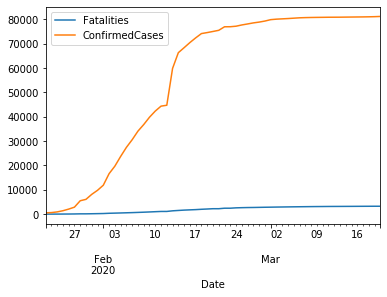

In [32]:
train[china_mask].groupby('Date').agg({'Fatalities':'sum',
                                      'ConfirmedCases':'sum'}).plot()

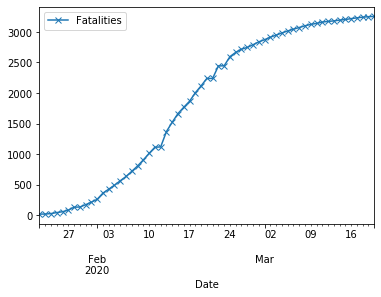

In [36]:
train[china_mask].groupby('Date').agg({'Fatalities':'sum'}).plot(marker='x')

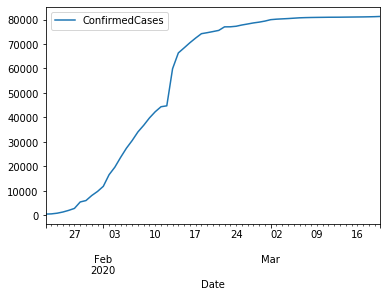

In [34]:
train[china_mask].groupby('Date').agg({'ConfirmedCases':'sum'}).plot()

China has indeed flattened the curve, for both confirmed cases and fatalities. The confirmed cases plateaued before fatalities, which makes sense and indicates confirmed cases should be a good predictor for fatalities.

In terms of machine learning, it's good that we have at least one example of a country where the number of cases stops increasing. This means in theory we have all the regimes we're likely to experience in the real world, assuming all countries can flatten the curve like this.

What will be important here is to have predictors regarding the actions taken to flatten the curve, i.e. travel bans, shelter in place, etc. and when they were taken.

# Map visualization (not updated)

In [32]:
group_by_country = \
train.groupby('Country/Region').agg({'Lat':'nunique',
                                     'Long':'nunique',
                                     'ConfirmedCases':'max',
                                     'Fatalities':'max'})
group_by_country

,Lat,Long,ConfirmedCases,Fatalities
Country/Region,,,,
Afghanistan,1,1,22.0,0.0
Albania,1,1,59.0,2.0
Algeria,1,1,74.0,7.0
Andorra,1,1,39.0,0.0
Antigua and Barbuda,1,1,1.0,0.0
...,...,...,...,...
Uruguay,1,1,50.0,0.0
Uzbekistan,1,1,15.0,0.0
Venezuela,1,1,36.0,0.0


In [47]:
group_by_country.tail(10)

,Lat,Long,ConfirmedCases,Fatalities
Country/Region,,,,
Turkey,1,1,98.0,1.0
US,58,58,2495.0,55.0
Ukraine,1,1,14.0,2.0
United Arab Emirates,1,1,113.0,0.0
United Kingdom,5,5,2626.0,71.0
Uruguay,1,1,50.0,0.0
Uzbekistan,1,1,15.0,0.0
Venezuela,1,1,36.0,0.0
Vietnam,1,1,75.0,0.0


In [49]:
index_list = group_by_country.index.tolist()
index_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cruise Ship',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 

In [52]:
mapper = {'US':'United States of America'}

In [53]:
new_index_list = [name if name not in mapper.keys() else mapper[name] for name in index_list]

In [54]:
new_index_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cruise Ship',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 

In [56]:
group_by_country.index = new_index_list

In [62]:
group_by_country.index.rename('Country/Region', inplace=True)

Looks like the dataset is at grain of country. Just one lat/long per country. For cases/fatalities, I think `max` is the appropriate aggregation since these are cumulative by date.

In [63]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [64]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


Probably not a perfect join since country names might be different. Can fix.

In [65]:
world_merged = world.merge(group_by_country, left_on = 'name',
                           right_on = 'Country/Region',
                           how='left')

In [66]:
type(world_merged)

geopandas.geodataframe.GeoDataFrame

In [67]:
world_merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Lat,Long,ConfirmedCases,Fatalities
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",1.0,1.0,3.0,0.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",10.0,11.0,221.0,7.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",58.0,58.0,2495.0,55.0


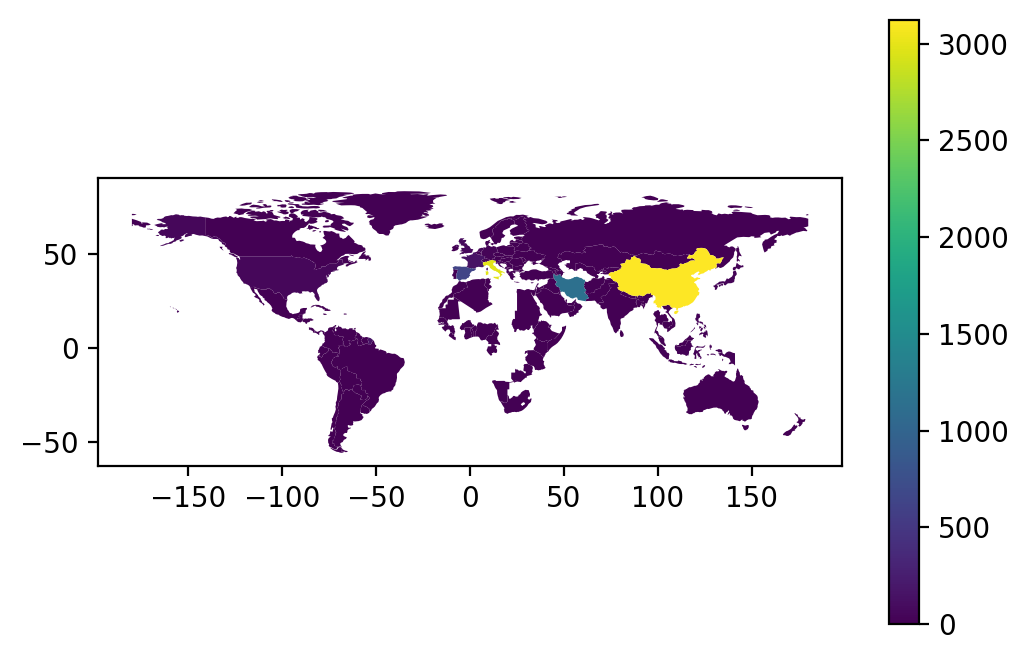

In [68]:
world_merged.plot(column='Fatalities', legend=True)

Text(0.5, 1.0, 'Confirmed cases')

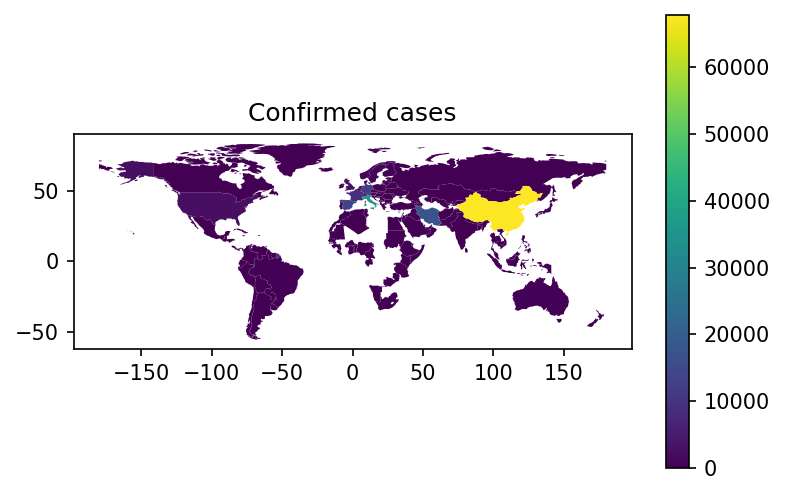

In [76]:
mpl.rcParams['figure.dpi'] = 150
world_merged.plot(column='ConfirmedCases', legend=True)
plt.title('Confirmed cases')

Text(0.5, 1.0, 'log_cases')

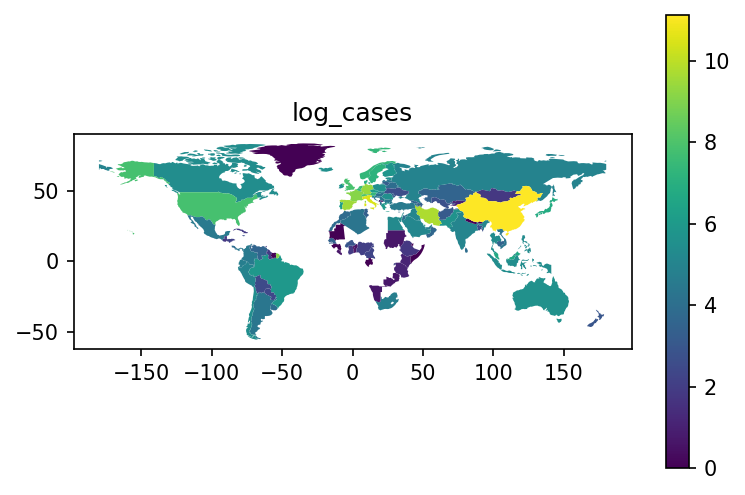

In [82]:
mpl.rcParams['figure.dpi'] = 150
non_zero_cases = world_merged['ConfirmedCases'] > 0
non_zero_cases_gdf = world_merged[non_zero_cases].copy()
non_zero_cases_gdf['log_cases'] = np.log(non_zero_cases_gdf['ConfirmedCases'])
non_zero_cases_gdf.plot(column='log_cases', legend=True)
plt.title('log_cases')

In [73]:
group_by_country.sort_values('Fatalities', ascending=False).head(10)

,Lat,Long,ConfirmedCases,Fatalities
Country/Region,,,,
China,33,33,67800.0,3122.0
Italy,1,1,35713.0,2978.0
Iran,1,1,17361.0,1135.0
Spain,1,1,13910.0,623.0
France,8,8,9043.0,148.0
"Korea, South",1,1,8413.0,84.0
United Kingdom,5,5,2626.0,71.0
Netherlands,3,3,2051.0,58.0
United States of America,58,58,2495.0,55.0


In [74]:
group_by_country.sort_values('ConfirmedCases', ascending=False).head(10)

,Lat,Long,ConfirmedCases,Fatalities
Country/Region,,,,
China,33,33,67800.0,3122.0
Italy,1,1,35713.0,2978.0
Iran,1,1,17361.0,1135.0
Spain,1,1,13910.0,623.0
Germany,1,1,12327.0,28.0
France,8,8,9043.0,148.0
"Korea, South",1,1,8413.0,84.0
Switzerland,1,1,3028.0,28.0
United Kingdom,5,5,2626.0,71.0
